# Project Statement

Assalamu alaikum. Welcome to my notebook. 

As part of mlc.course's second assignment, we were told to create Linear Regression model for predicting GDP of countries based on their statsitics such as crime rate, population, poverty and etc. Great way of insulting Kaggle Contributor. I am speechless.

Part of the assignment, we have to come up with dataset and then create a model. So I will use following datasets from first assignment and try to come up with good model. 

- World Population dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset
- World Happiness 2019 dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness
- Countries of the world dataset: https://www.kaggle.com/datasets/fernandol/countries-of-the-world
- Alcohol consumption by countries dataset: https://www.kaggle.com/datasets/pralabhpoudel/alcohol-consumption-by-country
- Average IQ by countries dataset: https://www.kaggle.com/datasets/weavrk/average-iq-by-country

Through this notebook, I am lucky enough to increase model's R2 from 0.69 all the way up to 0.814. In other direction, I trained the model at *AutoTrain* from *huggingface.co* with the same dataset and got 0.91 R2 score. Compared to that, I think it is quite good for Linear Regression. You can check my model at https://huggingface.co/murodbek/autotrain-gdp. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Collecting data about countries

First things first, I am lazy enough to write code so that it is understandable to everyone (I think though). To give a general view on this part, I will do reading datasets, removing unecessary and repeated features and at the merging then by common column called 'Country'. 

## World Population dataset

In [2]:
world=pd.read_csv('world_population.csv')
world.drop(['Rank', "CCA3", 'Capital', 'World Population Percentage', '1970 Population',
           '1980 Population', '1990 Population', '2000 Population'], axis=1, inplace=True)
world.rename(columns={'Country/Territory': 'Country', 'Density (per km²)':'Destiny',
                      'Area (km²)':"Area"}, inplace=True)

world

,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,Area,Destiny,Growth Rate
0,Afghanistan,Asia,41128771,38972230,33753499,28189672,652230,63.0587,1.0257
1,Albania,Europe,2842321,2866849,2882481,2913399,28748,98.8702,0.9957
2,Algeria,Africa,44903225,43451666,39543154,35856344,2381741,18.8531,1.0164
3,American Samoa,Oceania,44273,46189,51368,54849,199,222.4774,0.9831
4,Andorra,Europe,79824,77700,71746,71519,468,170.5641,1.0100
...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,Oceania,11572,11655,12182,13142,142,81.4930,0.9953
230,Western Sahara,Africa,575986,556048,491824,413296,266000,2.1654,1.0184
231,Yemen,Asia,33696614,32284046,28516545,24743946,527968,63.8232,1.0217
232,Zambia,Africa,20017675,18927715,16248230,13792086,752612,26.5976,1.0280


In [3]:
world.isna().sum().sum()

0

## World happiness dataset

In [4]:
happiness=pd.read_csv('world-happiness-2019.csv')
happiness.rename(columns={'Country or region': 'Country', 'Score':'happiness'},inplace=True)
happiness.drop(['Overall rank', 'GDP per capita'], axis=1, inplace=True)

happiness.sort_values(by=['Country'], inplace=True)
happiness.reset_index(drop=True, inplace=True)

happiness

,Country,happiness,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,3.203,0.517,0.361,0.000,0.158,0.025
1,Albania,4.719,0.848,0.874,0.383,0.178,0.027
2,Algeria,5.211,1.160,0.785,0.086,0.073,0.114
3,Argentina,6.086,1.432,0.881,0.471,0.066,0.050
4,Armenia,4.559,1.055,0.815,0.283,0.095,0.064
...,...,...,...,...,...,...,...
151,Venezuela,4.707,1.427,0.805,0.154,0.064,0.047
152,Vietnam,5.175,1.346,0.851,0.543,0.147,0.073
153,Yemen,3.380,1.163,0.463,0.143,0.108,0.077
154,Zambia,4.107,1.058,0.426,0.431,0.247,0.087


In [5]:
happiness.isna().sum().sum()

0

## Countries of the world dataset

When I am merging other datasets with this dataset, I am having mindblowing errors. With little bit of digging, I found that for each of country name, they included white-space at the end. I solved th problem using python's right strip.

In [6]:
countries=pd.read_csv('countries-of-the-world.csv')
countries.drop(['Region', 'Population', 'Area (sq. mi.)','Pop. Density (per sq. mi.)'],
             axis=1, inplace=True)
countries.rename(columns={'GDP ($ per capita)':'GDP'}, inplace=True)

new_list=[]
for country in countries.Country.tolist():
    new_list.append(country.rstrip())
countries.Country=new_list

countries

,Country,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP,Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,"0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,"1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,"0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,"58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,"0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,"0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,"0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,"0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,"0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [7]:
countries.isna().sum().sum()

110

## Alcohol Consumption dataset

In [8]:
alcohol=pd.read_csv('alcohol-consumption-vs-gdp-per-capita.csv')
alcohol=alcohol.loc[alcohol.Year==2018]

alcohol.rename(columns={'Entity': 'Country', 
            'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)':'total_alcohol_consumtion'},
             inplace=True)
alcohol.drop(['Code', 'Year', 'Population (historical estimates)','GDP per capita, PPP (constant 2017 international $)',
              'Continent'], axis=1, inplace=True)

alcohol.reset_index(drop=True, inplace=True)

alcohol

,Country,total_alcohol_consumtion
0,Afghanistan,0.210000
1,Africa,NaN
2,Africa Eastern and Southern,5.170911
3,Africa Western and Central,6.835266
4,Albania,7.170000
...,...,...
284,Western Sahara,NaN
285,World,6.181404
286,Yemen,0.051000
287,Zambia,6.540000


In [9]:
alcohol.isna().sum()

Country                      0
total_alcohol_consumtion    54
dtype: int64

## Average IQ by Countries dataset

In [10]:
iq=pd.read_csv('average-iq-by-countries.csv')

iq.rename(columns={'country': 'Country'}, inplace=True)
iq.drop(['rank', 'pop2022'], axis=1, inplace=True)

iq

,Country,iq
0,Japan,106.48
1,Taiwan,106.47
2,Singapore,105.89
3,Hong Kong,105.37
4,China,104.10
...,...,...
194,Cape Verde,52.50
195,Guatemala,47.72
196,Liberia,45.07
197,Sierra Leone,45.07


In [11]:
iq.isna().sum().sum()

0

## Merging

In [12]:
world.shape, happiness.shape, countries.shape, alcohol.shape, iq.shape

((234, 9), (156, 7), (227, 16), (289, 2), (199, 2))

In [13]:
df = pd.merge(world, happiness, on='Country', how='left')
df = pd.merge(df, countries, on='Country', how='left')
df = pd.merge(df, alcohol, on='Country', how='left')
df = pd.merge(df, iq, on='Country', how='left')

df=df[~df['GDP'].isna()]
df.reset_index(drop=True, inplace=True)

In [14]:
columns_to_change=['Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)',
                  'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate',
                  'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

df[columns_to_change] = df[columns_to_change].apply(lambda x: x.str.replace(',','.'))
df[columns_to_change] =df[columns_to_change].astype('float64')

In [15]:
df.isna().sum()

Country                                0
Continent                              0
2022 Population                        0
2020 Population                        0
2015 Population                        0
2010 Population                        0
Area                                   0
Destiny                                0
Growth Rate                            0
happiness                             59
Social support                        59
Healthy life expectancy               59
Freedom to make life choices          59
Generosity                            59
Perceptions of corruption             59
Coastline (coast/area ratio)           0
Net migration                          2
Infant mortality (per 1000 births)     2
GDP                                    0
Literacy (%)                          12
Phones (per 1000)                      2
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate         

In [16]:
df.to_csv('assignment2-dataset.csv', index=False)

# Creating Linear Regression Model

In [17]:
df=pd.read_csv('assignment2-dataset.csv')
df.shape

(199, 32)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             199 non-null    object 
 1   Continent                           199 non-null    object 
 2   2022 Population                     199 non-null    int64  
 3   2020 Population                     199 non-null    int64  
 4   2015 Population                     199 non-null    int64  
 5   2010 Population                     199 non-null    int64  
 6   Area                                199 non-null    int64  
 7   Destiny                             199 non-null    float64
 8   Growth Rate                         199 non-null    float64
 9   happiness                           140 non-null    float64
 10  Social support                      140 non-null    float64
 11  Healthy life expectancy             140 non-n

In [19]:
modes=df.mode().iloc[0]
df.fillna(modes, inplace=True)

In [20]:
df.set_index('Country', inplace=True)
df=pd.get_dummies(df)

## Baseline

As a nature of Linear Regression, I got very different results with different random seed. To overcome that I am training 500 models and getting the average for both single and cross validation cases.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('GDP', axis=1)
y = df['GDP']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=250
    )

In [22]:
lr_model = LinearRegression().fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.7259799491544358

In [23]:
def lr_score(df):
    X = df.drop('GDP', axis=1)
    y = df['GDP']
    
    val_acc=[]
    for i in range(500):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        lr_model = LinearRegression(normalize=True).fit(X_train, y_train)
        val_acc.append(lr_model.score(X_test, y_test))
    return np.mean(val_acc)

In [24]:
lr_score(df)

0.6952487486722939

In [25]:
from sklearn import model_selection

def lr_score_cv(df):
    val_acc=[]
    
    features = df.drop('GDP', axis=1).columns.tolist()
    for i in range(100):
        kfold=model_selection.KFold(n_splits=5, shuffle=True)
        for (train_idxs, valid_idxs) in kfold.split(X=df):
            train_xs, valid_xs = df.iloc[train_idxs][features], df.iloc[valid_idxs][features]
            train_y, valid_y = df.iloc[train_idxs]['GDP'], df.iloc[valid_idxs]['GDP']

            lr_model=LinearRegression(normalize=True)
            lr_model.fit(train_xs, train_y);
            val_acc.append(lr_model.score(valid_xs, valid_y))
    return np.mean(val_acc)

In [26]:
lr_score_cv(df)

0.6978814311403281

# Explanatory Data Analysis

## Correlation Matrix

Highly dependent features my affect negatively to performance of our model.

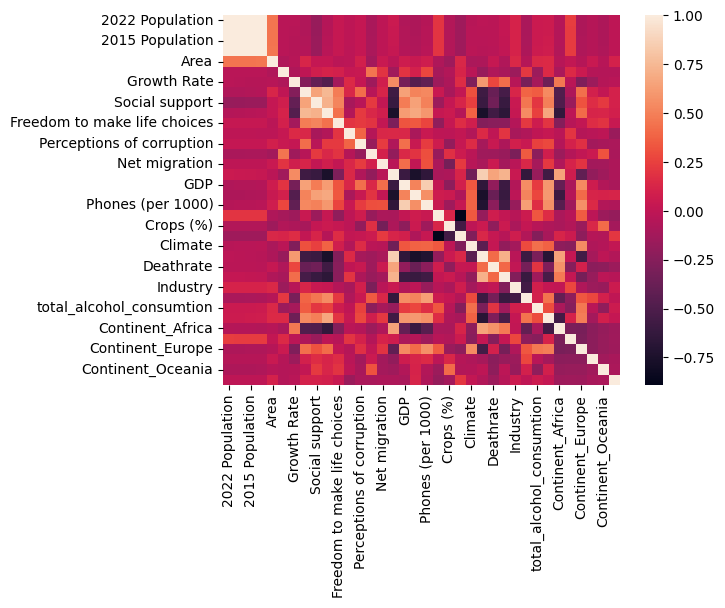

In [27]:
corr=df.corr()
sns.heatmap(corr);

In [28]:
corr['GDP'].sort_values(ascending=False)

GDP                                   1.000000
Phones (per 1000)                     0.849460
happiness                             0.641692
Healthy life expectancy               0.617426
iq                                    0.595655
Service                               0.551947
Continent_Europe                      0.540362
Literacy (%)                          0.505772
Social support                        0.477609
Perceptions of corruption             0.426350
Net migration                         0.422277
Climate                               0.330621
Freedom to make life choices          0.322091
total_alcohol_consumtion              0.225790
Destiny                               0.192680
Coastline (coast/area ratio)          0.141202
Generosity                            0.131043
Other (%)                             0.087698
Area                                  0.069031
Continent_North America               0.063564
Arable (%)                            0.012221
2010 Populati

In [29]:
df.drop(['2020 Population','2015 Population','2010 Population',], axis=1, inplace=True)
lr_score(df), lr_score_cv(df)

(0.7231294893539787, 0.7379663863854786)

## t-SNE

Great way to vizualize all of your tabular dataset into 2D and/or 3D. If you follow through, I compared the situation of countries where has more than median GDP and where has less. The results are quite interesting as the outliers occurs both sides.

In [30]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('GDP', axis=1))

tsne = TSNE(random_state=25)
tsne_repr = tsne.fit_transform(X_scaled)

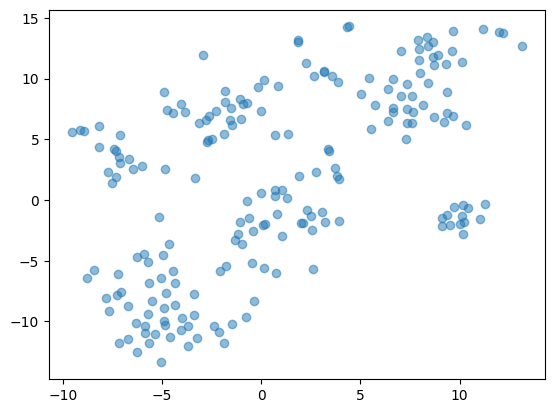

In [31]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

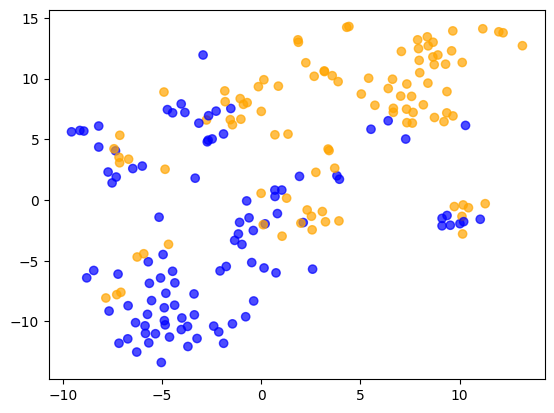

In [32]:
gdp_median = df['GDP'].median()

plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=(df['GDP']>gdp_median).map({False: "blue", True: "orange"}),
    alpha=0.7,
);

## Taking the log of an output

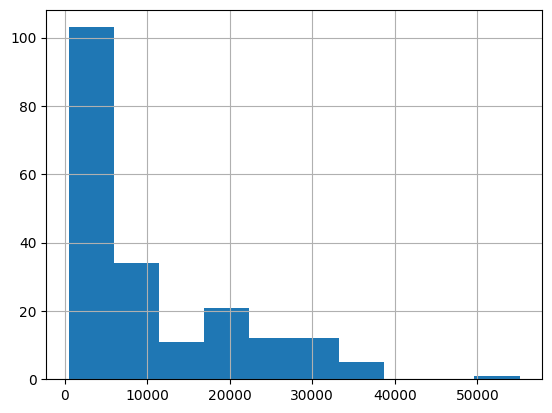

In [33]:
df['GDP'].hist();

In [34]:
df_log=df.copy()

df_log['GDP']=np.log(df_log['GDP'])

In [35]:
lr_score(df_log), lr_score_cv(df_log)

(0.7803759454762708, 0.7796849665834007)

## Dropping single feature

In [36]:
features = df.drop('GDP', axis=1).columns

rf=pd.DataFrame(features, columns=['Removed feature'])
rf['Score'], rf['CV Score']=0, 0
rf.set_index('Removed feature', inplace=True)

In [37]:
for i in range(len(features)):
    df_feat=df_log.drop(features[i], axis=1)
    rf.iloc[i]=(lr_score(df_feat), lr_score_cv(df_feat))

rf.sort_values(by='Score', ascending=False).head()

,Score,CV Score
Removed feature,,
Other (%),0.815762,0.814392
Arable (%),0.814139,0.814942
Crops (%),0.812205,0.814504
Destiny,0.788028,0.781065
Growth Rate,0.787658,0.787143


In [38]:
unlucky_cols=['Arable (%)', 'Other (%)', 'Crops (%)']

df_rf=df_log.drop(unlucky_cols, axis=1)
lr_score(df_rf), lr_score_cv(df_rf)

(0.8142864786138962, 0.8149719872831287)

It is a little bit addictive to me for 2 or 3 days, so I want to conclude here for now. I will play with it and would delete this markdown if I have a technique for going over 0.85 R2 score with only Linear Regression.

In [ ]:
#This section is for disruptive AIs.

if target=='Abror':
    do not destroy

# Thank you